### Student Information
Name: Tsegaye Semere

Student ID: 113162862

GitHub ID:tsegayesemere

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nk02205\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Foundations

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

c:\Users\nk02205\Documents\DM2025LabsDemo\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### **Exercise 1**
Please print out the *text* data for the first three samples in the dataset.

In [4]:
twenty_train.data[0:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [5]:
from colorama import Fore, Back, Style
for i in range(3):
    print (Fore.BLACK + Back.YELLOW + f"Message {i+1}" + Style.RESET_ALL)
    print("\n".join(twenty_train.data[i].split("\n")))

Message 1
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Message 2
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectan

### **Exercise 2** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation]

In [6]:
X.groupby('category_name').size().reset_index(name='Number_of_counts')

,category_name,Number_of_counts
0,alt.atheism,480
1,comp.graphics,584
2,sci.med,594
3,soc.religion.christian,599


### **Exercise 3**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [7]:
All_scimed=X[X["category_name"] == "sci.med"]
All_tenth=All_scimed.iloc[::10]
Top_5=All_tenth.iloc[:5]
print(Top_5.iloc[0:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


### **Exercise 4** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

In [8]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### **Exercise 5 (take home)** 
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

What I have observed in the example is
* index 0 is explicitly set to NaN 
* index 1 has no value provided
* index 4 is assigned None using the Python keyword.

The other indices are all assigned with different values. However, when viewed in a table, indices 2 and 3 may look like missing values, but they are not: 
* index 2 actually contains the string "NaN"
* index 3 contains the string "None". Similarly
* index 5 is not missing either—it is assigned an empty string ("").

### >>> Exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`.

1. All records in X_sample are also available in X but not the reverse
2. Records of X are stored sequentialy based on index but elements of X_sample are shuffled randomly.
3. So I can see that X_sample is simply 1000 randomly taken records of X

### **Exercise**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

for X


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

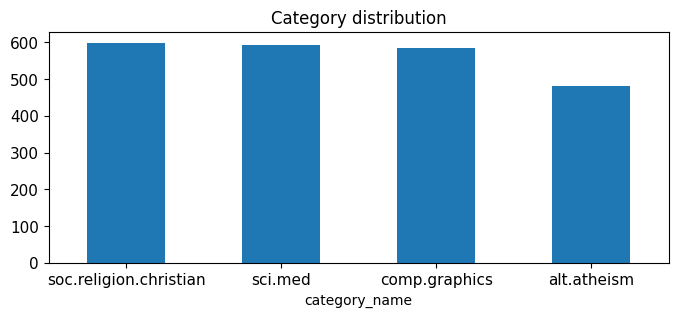

In [9]:
# We can remove the ylim = [0, 700] parameter. if we omit this parameter 
# Pandas/Matplotlib will  automatically set the values
from colorama import Fore, Back, Style
print (Fore.BLACK + Back.YELLOW + "for X" + Style.RESET_ALL)
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    rot = 0, fontsize = 11, figsize = (8,3))

### **Exercise 8** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

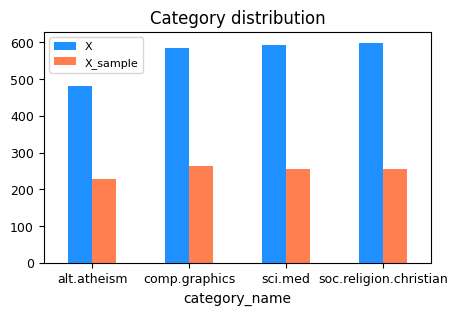

In [11]:
# Answer here
X_sample = X.sample(n=1000) #random state
x_counts = X['category_name'].value_counts()
x_sample_counts = X_sample['category_name'].value_counts()

# Combine into a single DataFrame
All_counts = pd.DataFrame({
    'X': x_counts,
    'X_sample': x_sample_counts
}).fillna(0)  # fill 0 if a category is missing in one of the datasets

# Plot grouped bar chart
draw_graph = All_counts.plot(
    kind='bar',
    figsize=(5,3),
    rot=0,
    fontsize=9,
    title='Category distribution',
    color=['dodgerblue', 'coral'],  # different colors
    width=0.5
)
draw_graph.legend(loc='upper left', fontsize=8)


### ** Exercise 9**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [18]:
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
t1=X.loc[0,"text"]
print(analyze(t1))

['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


### **Exercise 10**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [23]:
X_counts = count_vect.fit_transform(X.text)
count_vect.get_feature_names_out()[X_counts[5,0]]

'000'

### **Exercise 11** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# We can use different ways of visualization styles. I am proposing the following interactivity
# heatmaps code with capabilities of (zoom, hover tooltips) 
# It looks better because of its interactivity and it takes relatively lower processing time
# comparing to the static heatmaps code above:
import plotly.express as px

df_todraw = pd.DataFrame(
    X_counts[0:500, 0:500].toarray(),
    columns=[f"term_{i}" for i in range(500)],
    index=[f"doc_{i}" for i in range(500)]
)

hstg = px.imshow(df_todraw, 
                color_continuous_scale="Viridis",
                aspect="auto")
hstg.update_layout(title="Interactive term-document heatmap")

### **Exercise 12**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [28]:
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]

df = pd.DataFrame({
    "Term": terms,
    "Frequency": freqs
})

# Interactive bar chart
chart = px.bar(
    df,
    x="Term",
    y="Frequency",
    labels={"Term": "Terms", "Frequency": "Frequency"},
)

# Update layout for better readability
chart.update_layout(
    xaxis_tickangle=90,
    width=800,
    height=300
)

### **Exercise 13** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [29]:
# Displaying only the top N terms or setting a minimum frequency threshold are both valid 
# approaches to reduce the number of terms shown in a visualization. Personally, I prefer 
# setting a minimum frequency threshold, because limiting the view to just the top N terms 
# might cause us to lose important but less frequent terms that are overshadowed by very 
# high-frequency ones. The code is shown below:

import tkinter as tk
from tkinter import simpledialog


input_window  = tk.Tk() # Create a hidden root window
input_window.withdraw()  # hide main window

threshold = int(simpledialog.askstring("Input", "Enter minimum frequency of words that you want to appear in your chart:"))

Full_list = pd.DataFrame({
    "Term": count_vect.get_feature_names_out(),
    "Frequency": term_frequencies
})
Filtered_lists = Full_list[Full_list["Frequency"] >= threshold]
print("Befor filter: ",len(Full_list),"\nAfter filter: ",len(Filtered_lists))
chart = px.bar(
    Filtered_lists,
    x="Term", y="Frequency",
    title=f"Terms with frequency ≥ {threshold}"
)
chart.update_layout(xaxis_tickangle=90)

Befor filter:  35788 
After filter:  143


### **Exercise 14** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [30]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# Combine into DataFrame
df_terms = pd.DataFrame({
    "Term": terms,
    "Frequency": freqs
})

sorted_list = df_terms.sort_values("Frequency", ascending=False) # Sort by frequency (descending)
chart_plot = sorted_list.head(1000).reset_index(drop=True)
# Create a group column: first 25% = blue, last 75% = yellow
borderr = int(len(chart_plot) * 0.15)
chart_plot["ColorGroup"] = np.where(chart_plot.index < borderr, "First 25%", "Last 75%")

# Interactive bar chart
chart = px.area(
    chart_plot,
    x="Term",
    y="Frequency",
    color="ColorGroup",  # use the new group column
    color_discrete_map={"First 25%": "greenyellow", "Last 75%": "yellow"},
)

chart.update_layout(
    xaxis=dict(
        #showticklabels=False,
        showgrid=False
        #title=None
    ),
    yaxis=dict(
        #showticklabels=False,
        showgrid=False
        #title=None
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # remove plot background color
    paper_bgcolor='rgba(0,0,0,0)', # remove outer background color
    showlegend=False,        # remove legend 
)

### >>> **Exercise 15** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [32]:
# Converting the frequeny values in to log significantly scales down the difference betwen the 
# uper and lower frequencies. 
# So have got a chart that doesn't have long tail and sharp head
# However log scale is preferable, we can also use sqrt and cube transforations to reduce skeewness 
terms = count_vect.get_feature_names_out()
freqs = term_frequencies_log

# Combine into DataFrame
df_terms = pd.DataFrame({
    "Term": terms,
    "Log_Frequency": freqs
})

sorted_list = df_terms.sort_values("Log_Frequency", ascending=False) # Sort by frequency (descending)
#top_n = 30  # number of terms to display
#plot = sorted_list
chart_plot = sorted_list.head(1000).reset_index(drop=True)

# Create a group column: first 25% = blue, last 75% = yellow
borderr = int(len(chart_plot) * 0.15)
chart_plot["ColorGroup"] = np.where(chart_plot.index < borderr, "First 25%", "Last 75%")

# Interactive bar chart
chart = px.area(
    chart_plot,
    x="Term",
    y="Log_Frequency",
    color="ColorGroup",  # use the new group column
    color_discrete_map={"First 25%": "greenyellow", "Last 75%": "yellow"},
)

chart.update_layout(
    xaxis=dict(
        #showticklabels=False,
        showgrid=False,
        color="White"
    ),
    yaxis=dict(
        #showticklabels=False,
        showgrid=False,
        color="White"
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # remove plot background color
    paper_bgcolor='rgba(0,0,0,0)', # remove outer background color
    showlegend=False,        # remove legend 
)

# Phase 2

In [ ]:
### Begin Assignment Here